In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import style

In [2]:
# Quick peek at the dataset
df = pd.read_csv(r"C:\Users\BotchedPleb\OneDrive - Queens University of Charlotte\Documents\BIO_350_F25\Final_Project_BIO350\clean_individual_level_data_2021-01-10.csv")
df.head()

,sample_id,collect_date,age_yr,spikeod,spike_negod,spikeratio,spikepos,rbtc,county,vnrd,batch,sex,province,age_category,period3,period10
0,DBS-A0001,18-May-20,56,0.196,0.169,1.159763,0,Mombasa,mombasa,Family_replacement_donor,1,male,coast_mombasa,55-64yrs,1,2
1,DBS-A0002,18-May-20,35,0.228,0.169,1.349112,0,Mombasa,mombasa,Family_replacement_donor,1,male,coast_mombasa,35-44yrs,1,2
2,DBS-A0003,18-May-20,34,0.402,0.169,2.378698,1,Mombasa,mombasa,Family_replacement_donor,1,male,coast_mombasa,25-34yrs,1,2
3,DBS-A0004,18-May-20,31,0.147,0.169,0.869823,0,Mombasa,mombasa,Family_replacement_donor,1,male,coast_mombasa,25-34yrs,1,2
4,DBS-A0005,18-May-20,56,0.203,0.169,1.201183,0,Mombasa,mombasa,Family_replacement_donor,1,male,coast_mombasa,55-64yrs,1,2


In [3]:
# To double check for any possible null values in the already clean dataset
df.isnull().any()


sample_id       False
collect_date    False
age_yr          False
spikeod         False
spike_negod     False
spikeratio      False
spikepos        False
rbtc            False
county          False
vnrd            False
batch           False
sex             False
province        False
age_category    False
period3         False
period10        False
dtype: bool

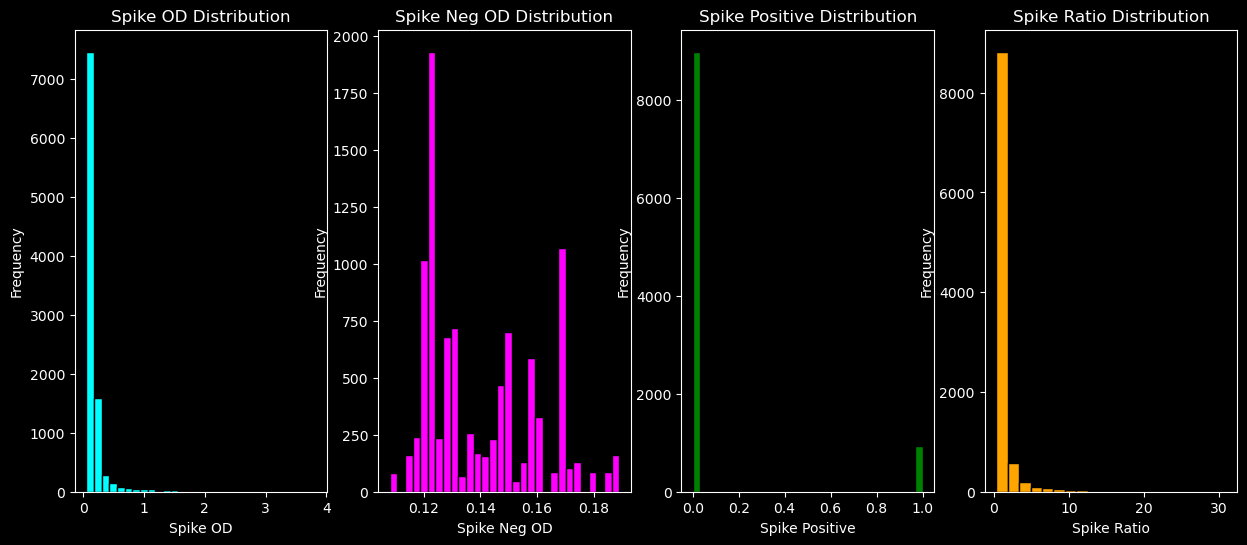

In [33]:
# Visuals regarding spikeod	spike_negod	spikeratio	spikepos
style.use('dark_background')
plt.figure(figsize=(15,6))
plt.subplot(1,4,1)
plt.hist(df['spikeod'], bins=30, color='cyan', edgecolor='black')
plt.title('Spike OD Distribution')
plt.xlabel('Spike OD')
plt.ylabel('Frequency')
plt.subplot(1,4,2)
plt.hist(df['spike_negod'], bins=30, color='magenta', edgecolor='black')
plt.title('Spike Neg OD Distribution')
plt.xlabel('Spike Neg OD')
plt.ylabel('Frequency')
plt.subplot(1,4,3)
plt.hist(df['spikepos'],bins=30, color='green', edgecolor='black')
plt.title('Spike Positive Distribution')
plt.xlabel('Spike Positive')
plt.ylabel('Frequency')
plt.subplot(1,4,4)
plt.hist(df['spikeratio'], bins=20, color='orange', edgecolor='black')
plt.title('Spike Ratio Distribution')
plt.xlabel('Spike Ratio')
plt.ylabel('Frequency')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

In [ ]:

# Load in Data
df = pd.read_csv(r"C:\Users\BotchedPleb\OneDrive - Queens University of Charlotte\Documents\BIO_350_F25\Final_Project_BIO350\clean_individual_level_data_2021-01-10.csv")

# 1. Features and Labels
X = df[['spikeod', 'spike_negod', 'spikeratio']]
y = df['spikepos']

# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------------------
# Logistic Regression Comparison
# -------------------------------
log_reg_unscaled = LogisticRegression(max_iter=1000)
log_reg_unscaled.fit(X_train, y_train)
y_pred_lr_unscaled = log_reg_unscaled.predict(X_test)

log_reg_scaled = LogisticRegression(max_iter=1000)
log_reg_scaled.fit(X_train_scaled, y_train)
y_pred_lr_scaled = log_reg_scaled.predict(X_test_scaled)

print("=== Logistic Regression ===")
print(f"Unscaled Accuracy: {accuracy_score(y_test, y_pred_lr_unscaled):.4f}")
print(f"Unscaled ROC-AUC: {roc_auc_score(y_test, log_reg_unscaled.predict_proba(X_test)[:,1]):.4f}")
print(f"Scaled Accuracy: {accuracy_score(y_test, y_pred_lr_scaled):.4f}")
print(f"Scaled ROC-AUC: {roc_auc_score(y_test, log_reg_scaled.predict_proba(X_test_scaled)[:,1]):.4f}")

# -------------------------------
# Random Forest Comparison
# -------------------------------
rf_unscaled = RandomForestClassifier(n_estimators=100, random_state=42)
rf_unscaled.fit(X_train, y_train)
y_pred_rf_unscaled = rf_unscaled.predict(X_test)

rf_scaled = RandomForestClassifier(n_estimators=100, random_state=42)
rf_scaled.fit(X_train_scaled, y_train)
y_pred_rf_scaled = rf_scaled.predict(X_test_scaled)

print("\n=== Random Forest ===")
print(f"Unscaled Accuracy: {accuracy_score(y_test, y_pred_rf_unscaled):.4f}")
print(f"Unscaled ROC-AUC: {roc_auc_score(y_test, rf_unscaled.predict_proba(X_test)[:,1]):.4f}")
print(f"Scaled Accuracy: {accuracy_score(y_test, y_pred_rf_scaled):.4f}")
print(f"Scaled ROC-AUC: {roc_auc_score(y_test, rf_scaled.predict_proba(X_test_scaled)[:,1]):.4f}")



=== Logistic Regression ===
Unscaled Accuracy: 0.9990
Unscaled ROC-AUC: 1.0000
Scaled Accuracy: 0.9980
Scaled ROC-AUC: 1.0000

=== Random Forest ===
Unscaled Accuracy: 0.9993
Unscaled ROC-AUC: 1.0000
Scaled Accuracy: 0.9993
Scaled ROC-AUC: 1.0000


In [7]:
# Adjusted Confusion Matrix
print("Confusion Matrix (Scaled):\n", confusion_matrix(y_test, y_pred_lr_scaled))
print("Classification Report:\n", classification_report(y_test, y_pred_lr_scaled))

print("Confusion Matrix (Unscaled):\n", confusion_matrix(y_test, y_pred_lr_unscaled))
print("Classification Report:\n", classification_report(y_test, y_pred_lr_unscaled))

Confusion Matrix (Scaled):
 [[2718    0]
 [   6  253]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2718
           1       1.00      0.98      0.99       259

    accuracy                           1.00      2977
   macro avg       1.00      0.99      0.99      2977
weighted avg       1.00      1.00      1.00      2977

Confusion Matrix (Unscaled):
 [[2718    0]
 [   3  256]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2718
           1       1.00      0.99      0.99       259

    accuracy                           1.00      2977
   macro avg       1.00      0.99      1.00      2977
weighted avg       1.00      1.00      1.00      2977

